The best parameters are:
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=0.1, kernel='linear', random_state=0)

Precision: 1.0
Accuracy: 0.9916666666666667
Recall: 0.9772727272727273
F1-score: 0.9885057471264368

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


Confusion Matrix: 
[[76  0]
 [ 1 43]]


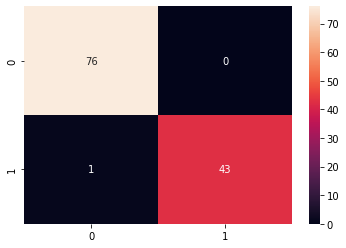

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
                   'C': [0.1, 1, 10, 100, 1000],
                   'gamma': ['scale', 'auto'],
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))
Sv_acc = metrics.accuracy_score(test_target, svm_prediction)

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)

def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D,'annotate3D',_annotate3D)


Please note that Shrinking has been encoded whereby 0 = False, 1 = True
Please note that Gamma has been encoded whereby 0 = auto, 1 = scale


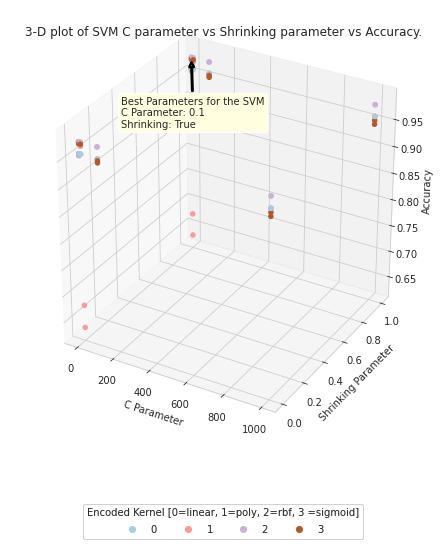

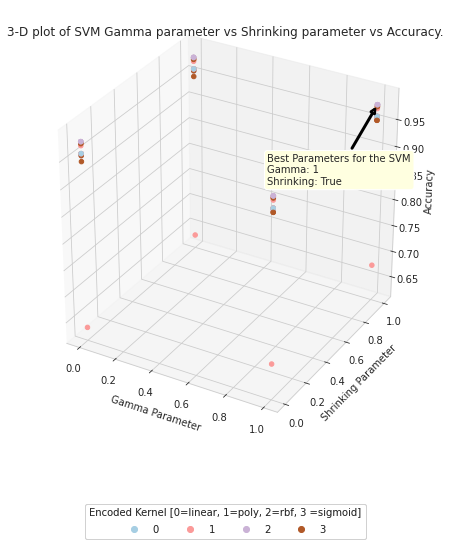

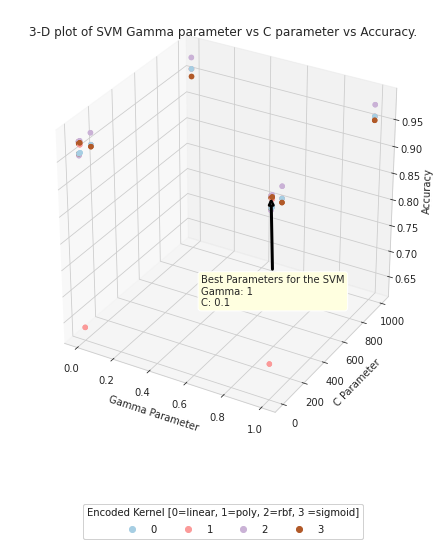

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})

#initialise empty lists
svm_C = []
svm_gamma = []
svm_kernel = []
svm_shrinking = []
svm_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in svm_grid_search.cv_results_['mean_test_score']:
        svm_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in svm_grid_search.cv_results_['params']:
    svm_C.append(each_parameter_combination['C'])
    svm_gamma.append(each_parameter_combination['gamma'])
    svm_kernel.append(each_parameter_combination['kernel'])
    svm_shrinking.append(each_parameter_combination['shrinking'])

#merge all the above lists into one single dataframe to summarize the SVM cross validation result
cross_validation_results_df = pd.DataFrame(svm_C, columns = ['C'])
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_gamma, columns = ['gamma']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_kernel, columns = ['kernel']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_shrinking, columns = ['shrinking']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_accuracy, columns = ['Accuracy']))

#encode the categorical SVM parameters of kernel, Shrinking and Gamma
svm_plot_encoder = preprocessing.LabelEncoder()
encoded_kernel = svm_plot_encoder.fit_transform(cross_validation_results_df['kernel'])
encoded_shrinking = svm_plot_encoder.fit_transform(cross_validation_results_df['shrinking'])
encoded_gamma = svm_plot_encoder.fit_transform(cross_validation_results_df['gamma'])

print('Please note that Shrinking has been encoded whereby 0 = False, 1 = True')
print('Please note that Gamma has been encoded whereby 0 = auto, 1 = scale')

#Save best model parameters
svm_best_parameters = svm_grid_search.best_params_

#For annotation purposes
best_accuracy_svm = max(cross_validation_results_df['Accuracy'])
best_C_svm = svm_best_parameters['C']
best_gamma_svm = svm_best_parameters['gamma']
best_kernel_svm = svm_best_parameters['kernel']
best_shrinking_svm = svm_best_parameters['shrinking']

#encoding best shrinking
if (best_shrinking_svm == 'False'):
    best_shrinking_svm = 0
elif (best_shrinking_svm == 'True'):
    best_shrinking_svm = 1

#encoding best Gamma
if (best_gamma_svm == 'auto'):
    best_gamma_svm = 0
elif (best_gamma_svm == 'scale'):
    best_gamma_svm = 1

#PLOT 1: C vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig1 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax1 = Axes3D(fig1)
#plot a 3-D scatter plot
scatter1 = ax1.scatter(cross_validation_results_df['C'], encoded_shrinking,
                      cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax1.set_title('3-D plot of SVM C parameter vs Shrinking parameter vs Accuracy.')
ax1.set_xlabel('C Parameter')
ax1.set_ylabel('Shrinking Parameter')
ax1.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax1.add_artist(legend1)
#annotation
parameters_annotation1 = 'Best Parameters for the SVM\nC Parameter: ' + str(best_C_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax1.annotate3D(parameters_annotation1, (best_C_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: Gamma vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig2 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax2 = Axes3D(fig2)
#plot a 3-D scatter plot
scatter2 = ax2.scatter(encoded_gamma, encoded_shrinking,
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax2.set_title('3-D plot of SVM Gamma parameter vs Shrinking parameter vs Accuracy.')
ax2.set_xlabel('Gamma Parameter')
ax2.set_ylabel('Shrinking Parameter')
ax2.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax2.add_artist(legend2)
#annotation
parameters_annotation2 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax2.annotate3D(parameters_annotation2, (best_gamma_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-110,-80), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: Gamma vs C Vs Accuracy Plot
#assign a 6x6 figure size
fig3 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax3 = Axes3D(fig3)
#plot a 3-D scatter plot
scatter3 = ax3.scatter(encoded_gamma, cross_validation_results_df['C'],
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax3.set_title('3-D plot of SVM Gamma parameter vs C parameter vs Accuracy.')
ax3.set_xlabel('Gamma Parameter')
ax3.set_ylabel('C Parameter')
ax3.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend3 = ax3.legend(*scatter3.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax3.add_artist(legend3)
#annotation
parameters_annotation3 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nC: ' + str(best_C_svm)
ax3.annotate3D(parameters_annotation3, (best_gamma_svm, best_C_svm, best_accuracy_svm), xytext=(-70,-110), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()